In [1]:
%matplotlib inline

In [55]:
from skimage.transform import hough_circle as hc, hough_ellipse as he
import numpy as np
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from skimage import draw
from skimage.feature import canny
from skimage.color import rgb2gray, hsv2rgb, rgb2hsv
r2g = rgb2gray
h2r = hsv2rgb
r2h = rgb2hsv
from skimage import io
from skimage.morphology import dilation, erosion
from skimage.measure import find_contours as fc
import skimage as sk
from skimage.morphology import convex_hull_image as conhu

In [3]:
def bwshow(*a, **k):
    plt.imshow(*a, cmap='gray', **k)
def ra():
    return hsv2rgb([np.random.rand(), 1, 1])
_lh = 0
def scol():
    global _lh
    c = hsv2rgb([_lh, 1, 1])
    _lh += 0.15
    return c

In [4]:
im = np.zeros((480,640, 3), np.float32)

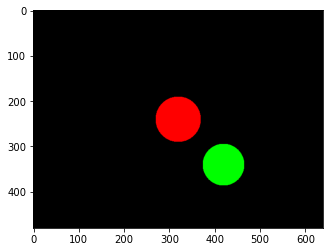

In [5]:
i2 = im.copy()
rr,cc = draw.disk((240,320), 50)
i2[rr,cc] = [1, 0, 0]
rr,cc = draw.disk((340,420), 46)
i2[rr,cc] = [0, 1, 0]
plt.imshow(i2)

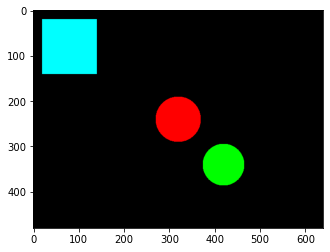

In [6]:
rr,cc = draw.rectangle((20, 20), (140,140))
i2[rr,cc]=[0, 1, 1]
plt.imshow(i2)

In [7]:
# %matplotlib qt

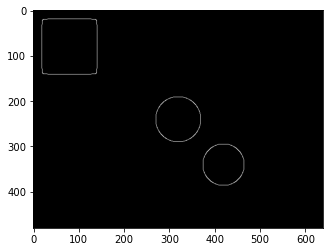

In [8]:
i3 = rgb2gray(i2)
plt.imshow(i3)
i3 = canny(i3, sigma=3)

bwshow(i3)

In [9]:
def plot_cir(im, p, q, r, ri):
    f, ax = plt.subplots()
    ax.imshow(im, cmap='gray')
    for p,q,r in zip(q, r, p):
        c = Circle((q,p),ri[r], fill=None, lw=3, ec=ra())
        ax.add_patch(c)
    

[1382721 1382719 1382080 1383360  218019  218021  218660  525220  217380
 1689920]
[240 240 239 241 340 340 341 340 339 240] [321 319 320 320 419 421 420 420 420 320] [4 4 4 4 0 0 0 1 0 5]


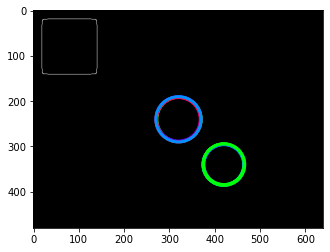

In [10]:
radii = np.arange(45, 55)
res = hc(i3, radii)
n = 10
am = np.argpartition(res.flatten(), -n)[-n:]
print(am)
rix,r,c = np.unravel_index(am, res.shape)
print(r, c, rix)
# bwshow(i3)
# _lh=0
# for p,q,r in zip(r,c,rix):
#     print(p,q,r)
#     c = Circle((q,p),radii[r], fill=None, lw=3, ec=co())
#     ax.add_patch(c)
plot_cir(i3, rix, r, c, radii)

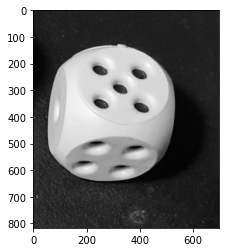

In [11]:
j1 = io.imread('die3.jpg')
j1 = rgb2gray(j1)
plt.imshow(j1, cmap='gray')

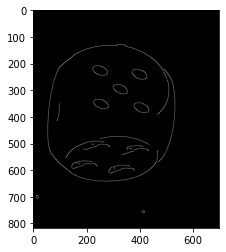

In [12]:
je = canny(j1, sigma=3)
bwshow(je)

(5, 817, 698)
[1 2 2 2 0 1 4 1 0 1 3 1] [377 252 612 307 250 608 308 608 251 608 610 251] [408 400 310 326 402 350 324 352 402 351 321 401]


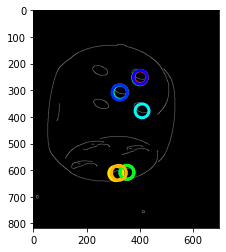

In [13]:
ri = np.arange(25, 30)
res = hc(je,ri)
print(res.shape)
n = 12
am = np.argpartition(res.flatten(), -n)[-n:]
p,q,r = np.unravel_index(am, res.shape)
print(p,q,r)
plot_cir(je, p, q, r, ri)
    

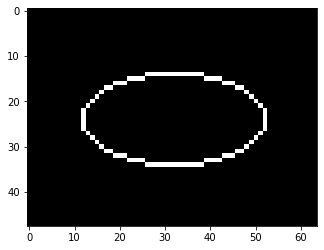

In [14]:
k = np.zeros((48, 64))
r,c=draw.ellipse_perimeter(24,32,10, 20)
k[r,c]=1
bwshow(k)

In [15]:
res = he(k, min_size=10, max_size=11)
print(res)

[(5, 23.5, 32., 10.48808848, 20.00624902, 3.11659786)
 (5, 23.5, 32., 20.00624902, 10.48808848, 1.59579112)
 (8, 24. , 32., 20.        ,  9.59166305, 1.57079633)
 (6, 24. , 32.,  9.94987437, 20.02498439, 3.09163426)
 (5, 24.5, 32., 10.48808848, 20.00624902, 3.11659786)
 (6, 24. , 32., 20.02498439,  9.94987437, 1.62075472)
 (5, 24.5, 32., 20.00624902, 10.48808848, 1.59579112)
 (6, 24. , 32.,  9.64365076, 19.23538406, 2.98499078)
 (6, 24. , 32., 19.23538406,  9.64365076, 1.7273982 )
 (6, 24. , 32.,  9.38083152, 18.43908891, 2.92292371)
 (6, 24. , 32., 18.43908891,  9.38083152, 1.78946527)
 (6, 24. , 32.,  6.32455532, 15.65247584, 2.67794504)
 (6, 24. , 32., 15.65247584,  6.32455532, 2.03444394)]


[(10, 10., 10., 8., 6., 0.)]


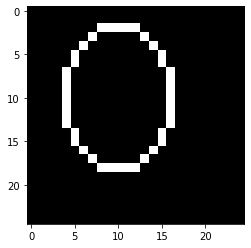

In [16]:
>>> from skimage.transform import hough_ellipse
>>> from skimage.draw import ellipse_perimeter
>>> img = np.zeros((25, 25), dtype=np.uint8)
>>> rr, cc = ellipse_perimeter(10, 10, 6, 8)
>>> img[cc, rr] = 1
>>> result = hough_ellipse(img, threshold=8)
>>> l = result
bwshow(img)
print(l)

In [17]:
def hist(img, ax=plt, **kwargs):
    h, x = np.histogram(img, **kwargs)
    ax.plot(x[:-1], h)

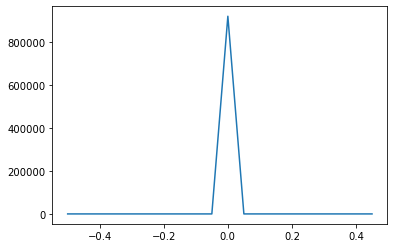

In [18]:
im2 = im.copy()
im2 = np.uint8(im2*255)
hist(im2, bins=20)

In [19]:
images = [None] * 6

In [20]:
nimg = 6
images = images + [None] * (nimg-len(images)) if len(images) < nimg else images
    

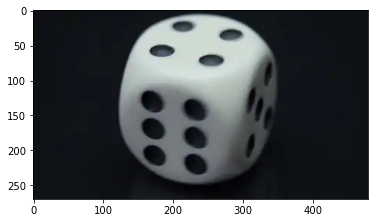

In [21]:
im = io.imread('b3side.jpg')
im2 = np.uint8(rgb2gray(im)*255)
bwshow(im)

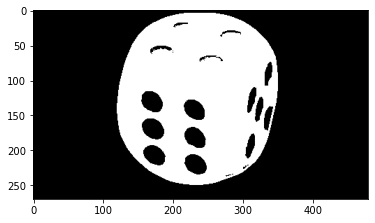

In [22]:
im3 = im2.copy()
### on black
p = 50
im3[im3<p]=0
im3[im3>=p]=1

im3bak = im3.copy()
im4 = conhu(im3)
im5 = dilation(canny(im4))
im3[im5]=1
bwshow(im3)
images[0] = (im, im3)

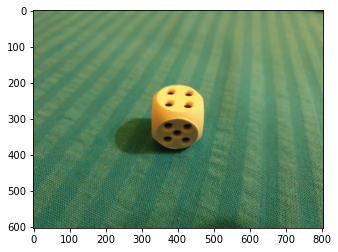

In [23]:
im = io.imread('2side.jpg')
im2 = np.uint8(rgb2gray(im)*255)
bwshow(im)

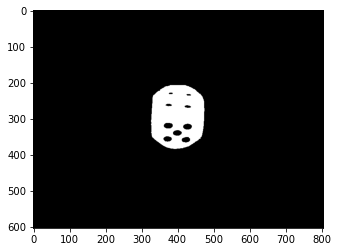

In [24]:
hsv = rgb2hsv(im)
im3 = im2.copy()
t = 0.2
im3[hsv[:, :, 0]>t]=0
im3[im3<60]=0
im3 = erosion(dilation(im3))
im3[im3<0.3]=0
im3[im3>=0.3]=1
bwshow(im3)
images[1] = (im, im3)


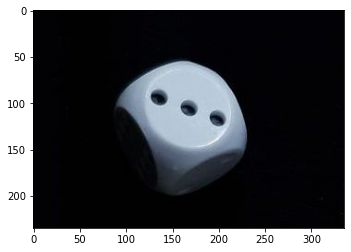

In [25]:
im = io.imread('die.jpg')
im2 = np.uint8(rgb2gray(im)*255)
bwshow(im)

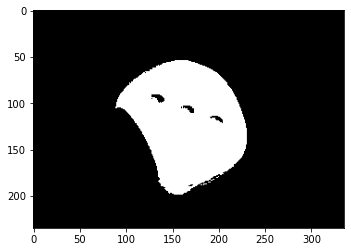

In [26]:
im3 = im2.copy()
### on black
p = 30
im3[im3<p]=0
im3[im3>=p]=1

im3bak = im3.copy()
im5 = dilation(canny(im3))
bwshow(im3)
images[2] = (im, im3)

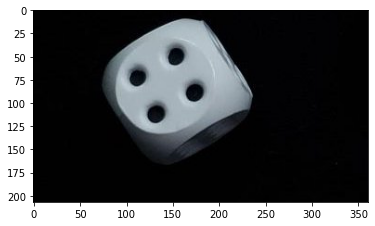

In [27]:
im = io.imread('die2.jpg')
im2 = np.uint8(rgb2gray(im)*255)
bwshow(im)

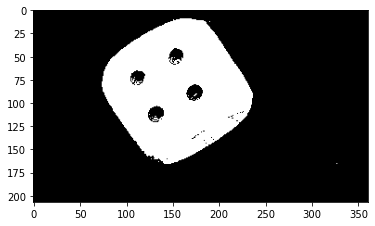

In [28]:
im3 = im2.copy()
### on black
p = 20
im3[im3<p]=0
im3[im3>=p]=1

im3bak = im3.copy()
im5 = dilation(canny(im3))
bwshow(im3)
images[3] = (im, im3)

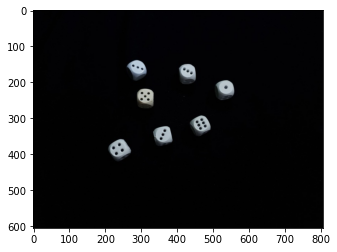

In [29]:
im = io.imread('dice.jpg')
bwshow(im)
im2 = np.uint8(rgb2gray(im)*255)

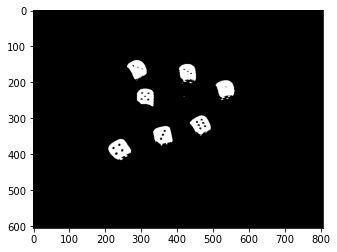

In [30]:
im3 = im2.copy()
p = 40
im3[im3<p]=0
im3[im3>=p]=1
bwshow(im3)
images[4] = (im.copy(), im3.copy())

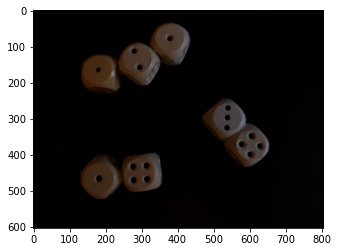

In [31]:
im = io.imread('join.jpg')
bwshow(im)
im2 = np.uint8(rgb2gray(im)*255)

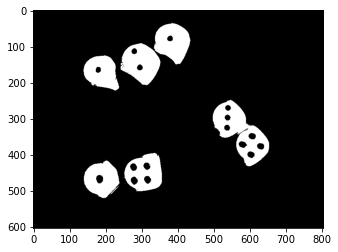

In [32]:
im3 = im2.copy()
p = 40
im3[im3<p]=0
im3[im3>=p]=1
bwshow(im3)
images[5] = (im.copy(), im3.copy())

In [33]:
def bbxywh(bb):
    return (bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0]
def bbctr(bb):
    xy, w, h = bbxywh(bb)
    return (xy[0]+w/2, xy[1]+h/2)
def bb_aspect(bb):
    _, w, h = bbxywh(bb)
    return w/h
def bb_ar(bb):
    _, w, h = bbxywh(bb)
    return w*h
def regbound(r, ax, ofs=[0, 0], col=None):
    bb = r.bbox
    x, w, h = bbxywh(bb)
    if col is None: col = ra()
    rect = pt.Rectangle((ofs[0]+x[0], ofs[1]+x[1]), 
                        w, h, fill=None, lw=2, ec=col)
    ax.add_patch(rect)
    return col
def touches_border(b, bor, sl=1):
    return b[0] <= bor[0]+sl or b[1] <= bor[1]+sl or b[2] >= bor[2]-sl or b[3] >= bor[3]-sl

6
[ 7918.61071429 32972.54672619  -191.60416667  1923.36666667
  1127.3          444.            40.79166667   922.52083333
    57.875        280.875         36.125        223.70833333]
[ 1.49612222e+04  3.81833333e+02  1.74316667e+03 -1.94583333e+01
  3.14583333e+01  2.00000000e+00]
[16419.76190476    83.45833333   560.04166667    41.5       ]


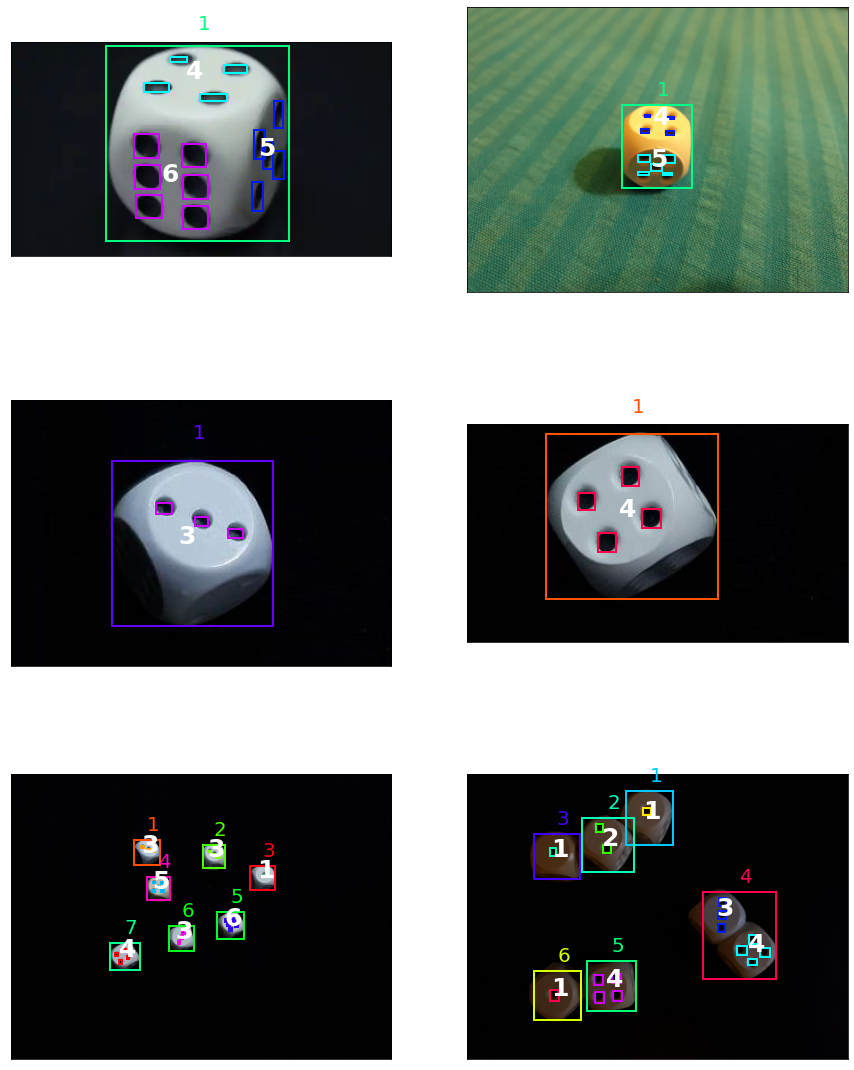

In [62]:
# %matplotlib qt
import matplotlib.patches as pt
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances as pd

def colax(m, n):
    fig, axs = plt.subplots(m, n) #, gridspec_kw={"wspace": 0, "hspace": 0})
    axs = axs.flatten()
    for a in axs:
        a.set_xticks([])
        a.set_yticks([])
    return fig, (a for a in axs.flatten())

def label_cluster(ax, x, cx, cy, lbl, fs=25, col='w'):
    ax.text(cx+x[0]-fs/2, cy+x[1], lbl, color=col, fontsize=fs, fontweight='bold')

def process(imbase, im01, axgen, group_dots=True, label_pics=True):
    global _lh
    im2 = imbase.copy()
    im3 = im01.copy()
    ax = next(axgen)
    
    txtcol='w'
    
    ax.imshow(im2, cmap='gray')
    if not label_pics:
        return
    ls = label(im3, background=0)
#     overlay = label2rgb(ls, im3, bg_label=0)
#     ax.imshow(overlay)
    rp = regionprops(ls)
    mears = [r.area for r in rp]
    mn = np.mean(mears)
    rp = list(filter(lambda r: r.area>0.1*mn, rp))

    for i, r in enumerate(rp):
        x, w, h = bbxywh(r.bbox)
        col = regbound(r, ax)
        ax.text(x[0]+w/2, x[1]-20, str(i+1), color=col, fontsize=20)
        subi = im3[x[1]:x[1]+w, x[0]:x[0]+h]
        
        rp2 = regionprops(label(subi, background=255))
        min_a = 0.0015*w*h
        max_a = 0.05*w*h
        rp2 = list(filter(lambda r1: not touches_border(r1.bbox, (0, 0, h, w)) 
                          and min_a < bb_ar(r1.bbox) < max_a , rp2))
        px = np.array([bbctr(r.bbox) for r in rp2])
        #print(px)
        #print( np.mean(pd(px)) )
#         ax2 = next(axgen)
#         ax3 = next(axgen)
        if len(px) < 1:
            continue
        if group_dots:
            coef = KMeans(n_clusters=1).fit(px).inertia_/np.sqrt(r.area)
#             print(i, len(rp2), coef)
        if group_dots and coef > 150:
#             print("RP2", len(rp2))
            ncs = list(range(1, len(rp2)))
            iner = []
            for cc in ncs:
                k = KMeans(n_clusters=cc).fit(px)
                iner.append(k.inertia_)
#             ax2.plot(ncs, iner)
            
            dif = np.diff(np.diff(iner))
            nc = np.argmax(dif)+2
            print(dif)
#             ax3.plot(ncs[:-2], dif)
            
            #print(ncs, iner)
#             print(np.array(iner)/np.sqrt(r.area))
            
            km = KMeans(n_clusters=nc).fit(px)
            _lh = 0.5
            cols = [scol() for _ in range(nc)]
            for j, r2 in enumerate(rp2):
                regbound(r2, ax, ofs=x, col=cols[km.labels_[j]])
            for ci in range(nc):
                cx, cy = km.cluster_centers_[ci]
                t = str(len(km.labels_[km.labels_==ci]))
                label_cluster(ax, x, cx, cy, t, col=txtcol)
        else:
            col1 = scol()
            for r2 in rp2:
                regbound(r2, ax, ofs=x, col=col1)
            label_cluster(ax, x, w/2, h/2, len(rp2), col=txtcol)

f, agen = colax(3, 2)
print(len(images))
f.set_size_inches(15, 20)
for e in images:
    if e:
        base, mask = e
        process(base, mask, agen, label_pics=True)
plt.show()

0 15 545.5331153071227
0 9 174.98092557049017
0 3 19.466599129797405
0 4 32.212747198390325
0 3 7.967222053716799
1 3 5.828578796735206
2 1 0.0
3 5 15.287926783805094
4 6 16.4350383853593
5 3 6.209932816275537
6 4 13.161083356739937
0 1 0.0
1 3 24.970411578130037
2 1 0.0
3 7 192.31506373153277
4 4 32.68259709486032
5 1 0.0


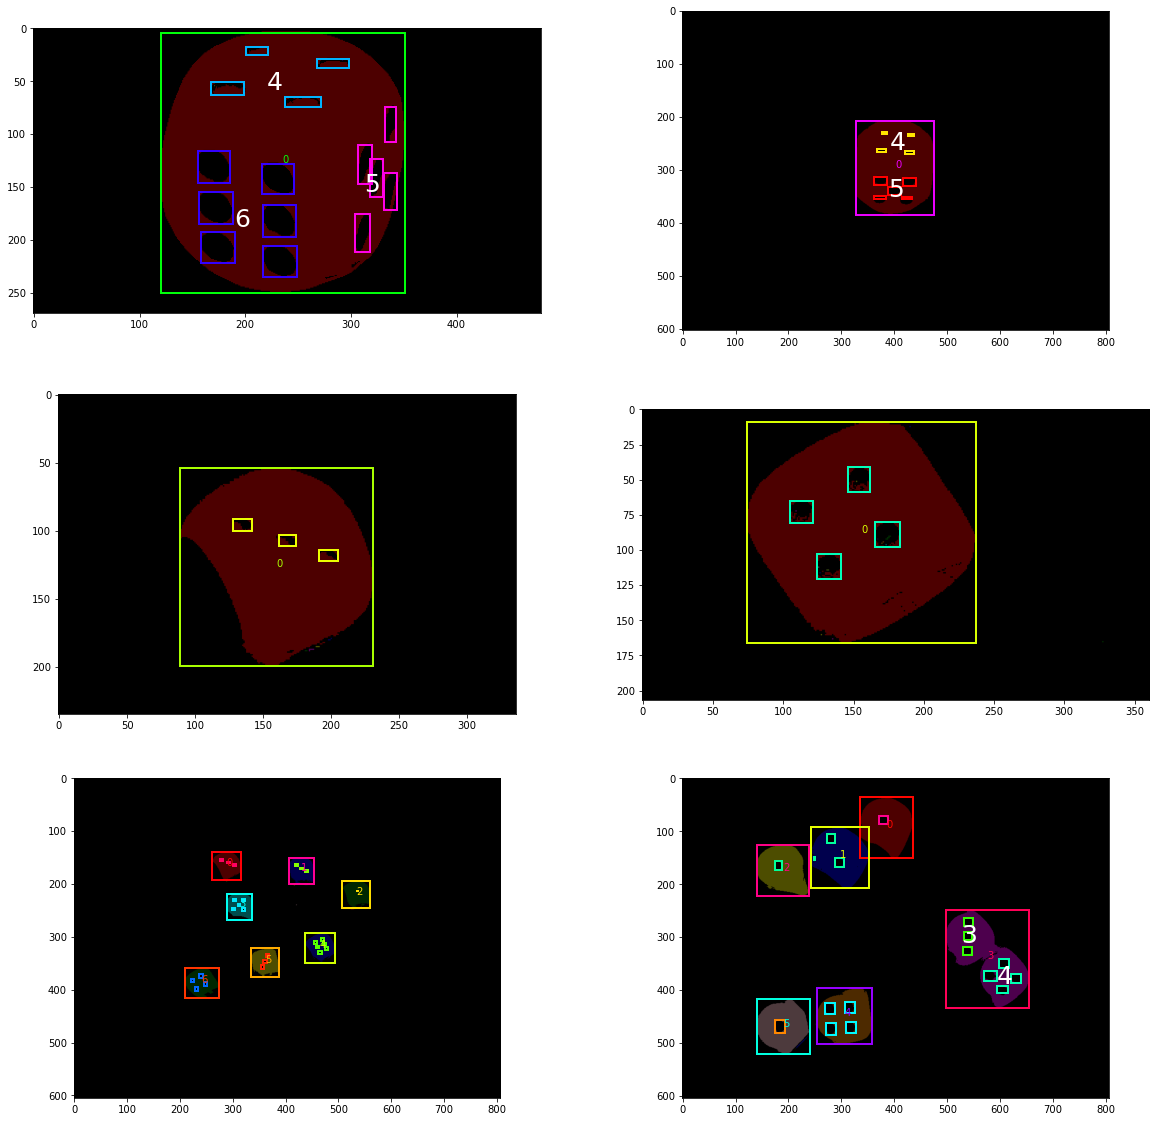

In [35]:
# %matplotlib qt
import matplotlib.patches as pt
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances as pd

def process2(base, im01, axgen, group_dots = True):
    im2 = base
    im3 = im01.copy()
    ax = next(axgen)
    ax.imshow(im2) #, cmap='gray')
    ls = label(im3, background=0)
    overlay = label2rgb(ls, im3, bg_label=0)
    ax.imshow(overlay)
    rp = regionprops(ls)
    mears = [r.area for r in rp]
    mn = np.mean(mears)
    rp = list(filter(lambda r: r.area>0.1*mn, rp))


    for i, r in enumerate(rp):
        x, w, h = bbxywh(r.bbox)
        col = regbound(r, ax)
        ax.text(x[0]+w/2, x[1]+h/2, str(i), color=col)
        subi = im3[x[1]:x[1]+w, x[0]:x[0]+h]
        rp2 = regionprops(label(subi, background=255))
        rp2 = list(filter(lambda r1: not touches_border(r1.bbox, (0, 0, h, w)), rp2))
        min_a = 0.001*w*h
        max_a = 0.05*w*h
        rp2 = list(filter(lambda r1: not touches_border(r1.bbox, (0, 0, h, w)) 
                          and min_a < bb_ar(r1.bbox) < max_a , rp2))
#         mears = [r.area for r in rp2]
#         mn = np.mean(mears)
#         sd = np.std(mears)
#         rp2 = filter(lambda r: r.area > 0.1*mn, rp2)
#         rp2 = list(rp2)
        px = np.array([bbctr(r.bbox) for r in rp2])
        if len(px) < 1:
            continue
        if group_dots:
            coef = KMeans(n_clusters=1).fit(px).inertia_/np.sqrt(r.area)
            print(i, len(rp2), coef)
        if group_dots and coef > 150:
            ncs = list(range(1, len(rp2)))
            iner = []
            for cc in ncs:
                k = KMeans(n_clusters=cc).fit(px)
                iner.append(k.inertia_)
            
            dif = np.diff(np.diff(iner))
            nc = np.argmax(dif)+2
            km = KMeans(n_clusters=nc).fit(px)
            cols = [scol() for _ in range(nc)]
            for j, r2 in enumerate(rp2):
                regbound(r2, ax, ofs=x, col=cols[km.labels_[j]])
            for ci in range(nc):
                cx, cy = km.cluster_centers_[ci]
                fs=25
                ax.text(cx+x[0]-fs/2, cy+x[1]+fs/2, str(len(km.labels_[km.labels_==ci])), color='w', fontsize=fs)
        else:
            co = ra()
            for r2 in rp2:
                regbound(r2, ax, ofs=x, col=co)
                
f, agen = colax(3, 2)
f.set_size_inches(20, 20)
for base, mask in images:
    process2(base, mask, agen)
plt.show()
        

In [36]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# from skimage import data
# from skimage.filters import threshold_otsu
# from skimage.segmentation import clear_border
# from skimage.measure import label, regionprops
# from skimage.morphology import closing, square
# from skimage.color import label2rgb


# image = data.coins()[50:-50, 50:-50]

# # apply threshold
# thresh = threshold_otsu(image)
# bw = closing(image > thresh, square(3))
# bwshow(bw)

# # remove artifacts connected to image border
# cleared = clear_border(bw)

# # label image regions
# label_image = label(cleared)
# # to make the background transparent, pass the value of `bg_label`,
# # and leave `bg_color` as `None` and `kind` as `overlay`
# image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.imshow(image_label_overlay)

# for region in regionprops(label_image):
#     # take regions with large enough areas
#     if region.area >= 100:
#         # draw rectangle around segmented coins
#         minr, minc, maxr, maxc = region.bbox
#         rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
#                                   fill=False, edgecolor='red', linewidth=2)
#         ax.add_patch(rect)

# ax.set_axis_off()
# plt.tight_layout()
# plt.show()